In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib
from sklearn.ensemble import RandomForestClassifier


In [4]:
data_path = "data/"
data_file = "competencia_01.csv"
df= pd.read_csv(data_path + data_file)

C:\Users\chris\AppData\Local\Temp\ipykernel_6592\4193464990.py:3: DtypeWarning: Columns (154) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(data_path + data_file)


# CONSTRUCCION DE COLUMNAS 

In [5]:
cat_cols =[]
num_cols=[]
col_drops=["numero_de_cliente","foto_mes","clase_ternaria","cliente_edad","cliente_antiguedad"
           ,"active_quarter","Visa_fultimo_cierre","Visa_fultimo_cierre","Master_fultimo_cierre","Visa_Fvencimiento",
           "Master_Fvencimiento"]
for c in df.columns:
    if (df[c].nunique() <= 5):
        cat_cols.append(c)
    else:
        num_cols.append(c)
lista_t=[c for c in list(map(lambda x : x if x[0]=='t' and x not in col_drops else np.nan ,df.columns )) if pd.notna(c)]
lista_c=[c for c in list(map(lambda x : x if x[0]=='c' and x not in col_drops else np.nan ,df.columns )) if pd.notna(c)]
lista_m=[c for c in list(map(lambda x : x if x[0]=='m' and x not in col_drops else np.nan ,df.columns )) if pd.notna(c)]
lista_r=[c for c in df.columns if c not in (lista_t + lista_c + lista_m +col_drops )]


# # Columnas lags y delta
cols_lag_delta_max_min_regl=lista_m + lista_c+ lista_r+lista_r

# # Columnas para regresion lineal y max-min
# lista_regl_max_min = lista_m + lista_c+ lista_r+lista_r

# # Columnas para los ratios
cols_ratios=[]
for c in lista_c:
    i=0
    while i < len(lista_m) and c[1:] != lista_m[i][1:]:
        i+=1
    if i < len(lista_m):
        cols_ratios.append([lista_m[i],c ])



In [6]:
lista_m

['mrentabilidad',
 'mrentabilidad_annual',
 'mcomisiones',
 'mactivos_margen',
 'mpasivos_margen',
 'mcuenta_corriente_adicional',
 'mcuenta_corriente',
 'mcaja_ahorro',
 'mcaja_ahorro_adicional',
 'mcaja_ahorro_dolares',
 'mcuentas_saldo',
 'mautoservicio',
 'mtarjeta_visa_consumo',
 'mtarjeta_master_consumo',
 'mprestamos_personales',
 'mprestamos_prendarios',
 'mprestamos_hipotecarios',
 'mplazo_fijo_dolares',
 'mplazo_fijo_pesos',
 'minversion1_pesos',
 'minversion1_dolares',
 'minversion2',
 'mpayroll',
 'mpayroll2',
 'mcuenta_debitos_automaticos',
 'mttarjeta_visa_debitos_automaticos',
 'mttarjeta_master_debitos_automaticos',
 'mpagodeservicios',
 'mpagomiscuentas',
 'mcajeros_propios_descuentos',
 'mtarjeta_visa_descuentos',
 'mtarjeta_master_descuentos',
 'mcomisiones_mantenimiento',
 'mcomisiones_otras',
 'mforex_buy',
 'mforex_sell',
 'mtransferencias_recibidas',
 'mtransferencias_emitidas',
 'mextraccion_autoservicio',
 'mcheques_depositados',
 'mcheques_emitidos',
 'mcheque

In [24]:
lista_c+lista_m + lista_t +lista_r

['cliente_vip',
 'cproductos',
 'ccuenta_corriente',
 'ccaja_ahorro',
 'cdescubierto_preacordado',
 'ctarjeta_debito',
 'ctarjeta_debito_transacciones',
 'ctarjeta_visa',
 'ctarjeta_visa_transacciones',
 'ctarjeta_master',
 'ctarjeta_master_transacciones',
 'cprestamos_personales',
 'cprestamos_prendarios',
 'cprestamos_hipotecarios',
 'cplazo_fijo',
 'cinversion1',
 'cinversion2',
 'cseguro_vida',
 'cseguro_auto',
 'cseguro_vivienda',
 'cseguro_accidentes_personales',
 'ccaja_seguridad',
 'cpayroll_trx',
 'cpayroll2_trx',
 'ccuenta_debitos_automaticos',
 'ctarjeta_visa_debitos_automaticos',
 'ctarjeta_master_debitos_automaticos',
 'cpagodeservicios',
 'cpagomiscuentas',
 'ccajeros_propios_descuentos',
 'ctarjeta_visa_descuentos',
 'ctarjeta_master_descuentos',
 'ccomisiones_mantenimiento',
 'ccomisiones_otras',
 'cforex',
 'cforex_buy',
 'cforex_sell',
 'ctransferencias_recibidas',
 'ctransferencias_emitidas',
 'cextraccion_autoservicio',
 'ccheques_depositados',
 'ccheques_emitidos',

In [27]:
sorted(cat_cols)

['Master_delinquency',
 'Master_status',
 'Visa_delinquency',
 'Visa_status',
 'active_quarter',
 'ccajas_transacciones',
 'ccuenta_corriente',
 'cdescubierto_preacordado',
 'clase_ternaria',
 'cliente_vip',
 'cmobile_app_trx',
 'cseguro_accidentes_personales',
 'cseguro_vida',
 'ctarjeta_master',
 'ctarjeta_visa',
 'internet',
 'tcallcenter',
 'tcuentas',
 'thomebanking',
 'tmobile_app']

In [13]:
lista_t

['tcuentas', 'tcallcenter', 'thomebanking', 'tmobile_app']

In [14]:
lista_c

['cliente_vip',
 'cproductos',
 'ccuenta_corriente',
 'ccaja_ahorro',
 'cdescubierto_preacordado',
 'ctarjeta_debito',
 'ctarjeta_debito_transacciones',
 'ctarjeta_visa',
 'ctarjeta_visa_transacciones',
 'ctarjeta_master',
 'ctarjeta_master_transacciones',
 'cprestamos_personales',
 'cprestamos_prendarios',
 'cprestamos_hipotecarios',
 'cplazo_fijo',
 'cinversion1',
 'cinversion2',
 'cseguro_vida',
 'cseguro_auto',
 'cseguro_vivienda',
 'cseguro_accidentes_personales',
 'ccaja_seguridad',
 'cpayroll_trx',
 'cpayroll2_trx',
 'ccuenta_debitos_automaticos',
 'ctarjeta_visa_debitos_automaticos',
 'ctarjeta_master_debitos_automaticos',
 'cpagodeservicios',
 'cpagomiscuentas',
 'ccajeros_propios_descuentos',
 'ctarjeta_visa_descuentos',
 'ctarjeta_master_descuentos',
 'ccomisiones_mantenimiento',
 'ccomisiones_otras',
 'cforex',
 'cforex_buy',
 'cforex_sell',
 'ctransferencias_recibidas',
 'ctransferencias_emitidas',
 'cextraccion_autoservicio',
 'ccheques_depositados',
 'ccheques_emitidos',

In [15]:
lista_m

['mrentabilidad',
 'mrentabilidad_annual',
 'mcomisiones',
 'mactivos_margen',
 'mpasivos_margen',
 'mcuenta_corriente_adicional',
 'mcuenta_corriente',
 'mcaja_ahorro',
 'mcaja_ahorro_adicional',
 'mcaja_ahorro_dolares',
 'mcuentas_saldo',
 'mautoservicio',
 'mtarjeta_visa_consumo',
 'mtarjeta_master_consumo',
 'mprestamos_personales',
 'mprestamos_prendarios',
 'mprestamos_hipotecarios',
 'mplazo_fijo_dolares',
 'mplazo_fijo_pesos',
 'minversion1_pesos',
 'minversion1_dolares',
 'minversion2',
 'mpayroll',
 'mpayroll2',
 'mcuenta_debitos_automaticos',
 'mttarjeta_visa_debitos_automaticos',
 'mttarjeta_master_debitos_automaticos',
 'mpagodeservicios',
 'mpagomiscuentas',
 'mcajeros_propios_descuentos',
 'mtarjeta_visa_descuentos',
 'mtarjeta_master_descuentos',
 'mcomisiones_mantenimiento',
 'mcomisiones_otras',
 'mforex_buy',
 'mforex_sell',
 'mtransferencias_recibidas',
 'mtransferencias_emitidas',
 'mextraccion_autoservicio',
 'mcheques_depositados',
 'mcheques_emitidos',
 'mcheque

In [18]:
lista_r

['internet',
 'Master_delinquency',
 'Master_status',
 'Master_mfinanciacion_limite',
 'Master_Fvencimiento',
 'Master_Finiciomora',
 'Master_msaldototal',
 'Master_msaldopesos',
 'Master_msaldodolares',
 'Master_mconsumospesos',
 'Master_mconsumosdolares',
 'Master_mlimitecompra',
 'Master_madelantopesos',
 'Master_madelantodolares',
 'Master_fultimo_cierre',
 'Master_mpagado',
 'Master_mpagospesos',
 'Master_mpagosdolares',
 'Master_fechaalta',
 'Master_mconsumototal',
 'Master_cconsumos',
 'Master_cadelantosefectivo',
 'Master_mpagominimo',
 'Visa_delinquency',
 'Visa_status',
 'Visa_mfinanciacion_limite',
 'Visa_Fvencimiento',
 'Visa_Finiciomora',
 'Visa_msaldototal',
 'Visa_msaldopesos',
 'Visa_msaldodolares',
 'Visa_mconsumospesos',
 'Visa_mconsumosdolares',
 'Visa_mlimitecompra',
 'Visa_madelantopesos',
 'Visa_madelantodolares',
 'Visa_fultimo_cierre',
 'Visa_mpagado',
 'Visa_mpagospesos',
 'Visa_mpagosdolares',
 'Visa_fechaalta',
 'Visa_mconsumototal',
 'Visa_cconsumos',
 'Visa

In [11]:
cat_cols

['active_quarter',
 'cliente_vip',
 'internet',
 'tcuentas',
 'ccuenta_corriente',
 'cdescubierto_preacordado',
 'ctarjeta_visa',
 'ctarjeta_master',
 'cseguro_vida',
 'cseguro_accidentes_personales',
 'tcallcenter',
 'thomebanking',
 'ccajas_transacciones',
 'tmobile_app',
 'cmobile_app_trx',
 'Master_delinquency',
 'Master_status',
 'Visa_delinquency',
 'Visa_status',
 'clase_ternaria']

In [3]:
model = joblib.load("outputs/model_rf/rf_model__completo_2025-09-20_13-16-23.sav")
model.classes_

array([0, 1])

In [4]:
model.feature_importances_

array([3.37386207e-04, 0.00000000e+00, 8.52824713e-06, ...,
       6.85753755e-05, 0.00000000e+00, 1.26567885e-04], shape=(1507,))

In [5]:
X_train = pd.read_csv("outputs/data_outputs/X_train_sample_imp.csv",index_col=0)
y_train=pd.read_csv("outputs/data_outputs/y_train_sample.csv",index_col=0)
print(X_train.shape , y_train.shape)



(4085, 1507) (4085, 1)


In [6]:
y_train

,clase_ternaria
123,0
862,0
1036,1
1365,0
1797,0
...,...
977414,1
977581,1
977754,0
977964,1


In [15]:
df_cluster=pd.read_csv("outputs/segmentacion/model_2_completo_cluster_5_2025-09-20_13-16-23.csv",index_col=0)
df_cluster

,cluster,original_class
123,2,0
862,2,0
1036,4,1
1365,4,0
1797,4,0
...,...,...
977414,1,1
977581,0,1
977754,4,0
977964,1,1


In [11]:
cluster_distribucion=pd.read_csv("outputs/segmentacion/model_2_completo_cluster_distribution_5_2025-09-20_13-16-23.csv")
cluster_distribucion

,cluster,0,1,average_prob_baja
0,0,264,492,0.294814
1,1,14,720,0.790995
2,2,986,32,0.016914
3,3,86,689,0.703640
4,4,650,152,0.076948


In [13]:
n_por_cluster = cluster_distribucion[["0","1"]].sum(axis=1)
cluster_distribucion["ratio"] = cluster_distribucion["1"]/n_por_cluster
cluster_distribucion

,cluster,0,1,average_prob_baja,ratio
0,0,264,492,0.294814,0.650794
1,1,14,720,0.790995,0.980926
2,2,986,32,0.016914,0.031434
3,3,86,689,0.703640,0.889032
4,4,650,152,0.076948,0.189526


In [16]:
df_cluster

,cluster,original_class
123,2,0
862,2,0
1036,4,1
1365,4,0
1797,4,0
...,...,...
977414,1,1
977581,0,1
977754,4,0
977964,1,1


In [18]:
df_cluster

,cluster,original_class
123,2,0
862,2,0
1036,4,1
1365,4,0
1797,4,0
...,...,...
977414,1,1
977581,0,1
977754,4,0
977964,1,1


In [17]:
df_cluster[df_cluster["cluster"] ==2 ].index

Index([   123,    862,   2431,   2647,   3537,   3876,   4127,   4770,   4854,
         5241,
       ...
       969611, 971214, 972042, 974029, 974347, 974513, 975757, 975885, 975972,
       976709],
      dtype='int64', length=1018)

In [19]:
# sacar las features más importantes
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_series = pd.Series(importances, index=feature_names)

feature_selected = feature_importance_series.sort_values(ascending=False)

n_top = 20 # cantidad de variables a evaluar.
top_overall_features = feature_selected.head(n_top).index.tolist()

# cluster_series_aligned = pd.Series(clusters, index=Xtrain_rf.index)

cluster_median_values = {}

for cluster in sorted(df_cluster["cluster"].unique()):
    cluster_indices = df_cluster[df_cluster["cluster"] ==cluster ].index
    cluster_data = X_train.loc[cluster_indices, top_overall_features]

    # Usar el estadístico de su preferencia
    values = cluster_data.median()
    cluster_median_values[f'Cluster {cluster}'] = values

top_overall_features_df = pd.DataFrame(cluster_median_values)
display(top_overall_features_df)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
ctrx_quarter,36.000,21.000,124.0000,4.00,109.0000
MAX_Visa_fultimo_cierre,5.000,4.000,5.0000,5.00,5.0000
MAX_Visa_fultimo_cierre_1,5.000,4.000,5.0000,5.00,5.0000
ctrx_quarter_lag_1,36.500,23.000,122.0000,4.00,108.5000
MAX_ctrx_quarter,47.000,30.000,140.0000,8.00,124.5000
MAX_Master_fultimo_cierre_1,5.000,4.000,5.0000,5.00,5.0000
MAX_Master_fultimo_cierre,5.000,4.000,5.0000,5.00,5.0000
MAX_mpasivos_margen,473.010,158.635,1518.4600,20.24,1526.8150
MIN_ctrx_quarter,27.000,17.000,108.0000,2.00,91.0000
MAX_mcaja_ahorro,14995.920,2982.015,71239.6500,0.00,51154.5500


In [38]:
cluster_ind = df_cluster[df_cluster["cluster"]==4].index


In [45]:
X_train["cluster"] = df_cluster["cluster"]

In [46]:
X_train["cluster"] 

123       2
862       2
1036      4
1365      4
1797      4
         ..
977414    1
977581    0
977754    4
977964    1
978380    0
Name: cluster, Length: 4085, dtype: int64

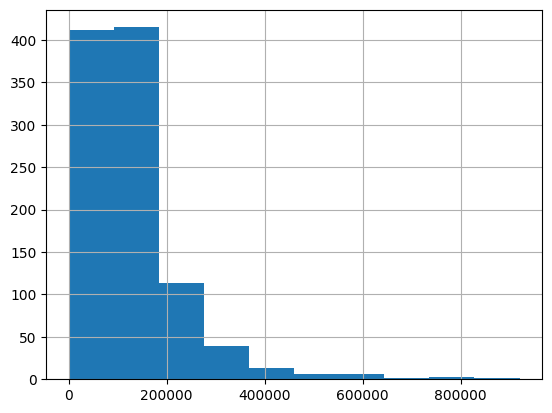

In [47]:
f=(X_train["mpayroll"] < 1e6 ) & (X_train["cluster"] ==2)
X_aux = X_train.loc[f,"mpayroll"].hist()

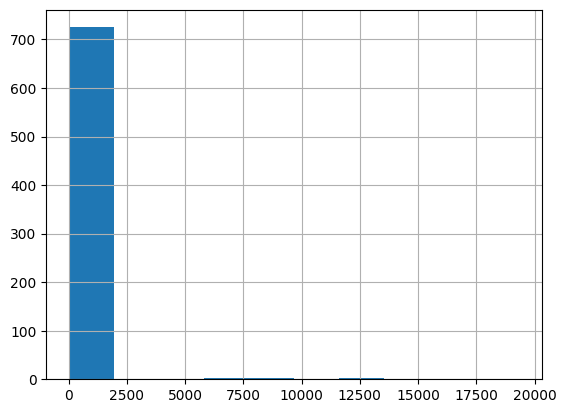

In [50]:
f=(X_train["mpayroll"] < 20000 ) & (X_train["cluster"] ==4)
X_aux = X_train.loc[f,"mpayroll"].hist()

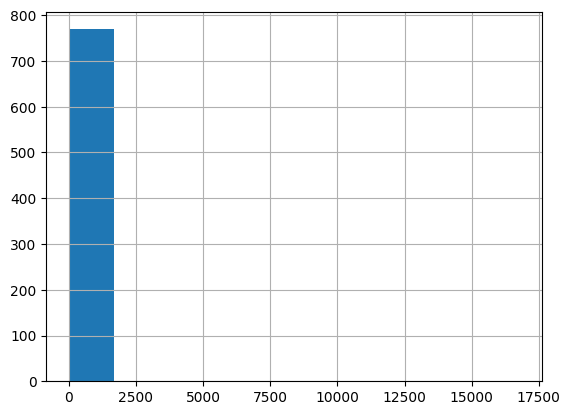

In [52]:
f=(X_train["mpayroll"] < 20000 ) & (X_train["cluster"] ==3)
X_aux = X_train.loc[f,"mpayroll"].hist()

In [55]:
def compare_cluster_stats(data, clusters, variable_name, target_cluster):

    variable_data = data[variable_name]

    target_cluster_indices = df_cluster[df_cluster["cluster"] == target_cluster].index
    target_cluster_data = variable_data.loc[target_cluster_indices] # Keep NaNs for counting

    rest_indices =  df_cluster[df_cluster["cluster"] != target_cluster].index
    rest_data = variable_data.loc[rest_indices] # Keep NaNs for counting

    target_cluster_desc = target_cluster_data.dropna().describe()
    rest_desc = rest_data.dropna().describe()

    summary_df = pd.DataFrame({
        f'Cluster {target_cluster}': target_cluster_desc,
        f'Rest of Clusters': rest_desc
    })

    summary_df.loc['unique'] = [target_cluster_data.nunique(), rest_data.nunique()]
    summary_df.loc['missing'] = [target_cluster_data.isnull().sum(), rest_data.isnull().sum()]

    return summary_df

print(f"'mcaja_ahorro' - Cluster 2 vs. Rest")
compare_cluster_stats(X_train, df_cluster, 'mpayroll', 4)

'mcaja_ahorro' - Cluster 2 vs. Rest


,Cluster 4,Rest of Clusters
count,8.020000e+02,3.283000e+03
mean,2.265610e+04,5.002272e+04
std,2.183895e+05,1.703209e+05
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,7.288767e+04
max,5.197584e+06,7.008191e+06
unique,7.800000e+01,1.124000e+03
missing,0.000000e+00,0.000000e+00


In [60]:
X_train.drop(columns="cluster",inplace=True)

In [61]:
important_features_by_cluster = {}

for cluster in sorted(df_cluster["cluster"].unique()):
    print(f"Training model for Cluster {cluster} vs. Rest...")
    y_binary = (df_cluster["cluster"] == cluster).astype(int)

    model = RandomForestClassifier(n_estimators=100, random_state=17, class_weight='balanced') # Added class_weight for imbalanced data
    model.fit(X_train, y_binary)

    importances = model.feature_importances_
    feature_names = X_train.columns

    indices = np.argsort(importances)[::-1]

    important_features_by_cluster[cluster] = [feature_names[i] for i in indices]

Training model for Cluster 0 vs. Rest...
Training model for Cluster 1 vs. Rest...
Training model for Cluster 2 vs. Rest...
Training model for Cluster 3 vs. Rest...
Training model for Cluster 4 vs. Rest...


In [62]:
print(important_features_by_cluster[0])

['MAX_Master_fultimo_cierre_1', 'MAX_Visa_fultimo_cierre_1', 'ctrx_quarter', 'MAX_Visa_fultimo_cierre', 'MIN_ctrx_quarter', 'MAX_Master_fultimo_cierre', 'ctrx_quarter_lag_1', 'MAX_ctrx_quarter', 'ctrx_quarter_lag_2', 'MAX_mpasivos_margen', 'MIN_mpayroll', 'MAX_mcaja_ahorro', 'MAX_mcuentas_saldo', 'mpayroll_lag_1', 'MIN_mtarjeta_visa_consumo', 'mpasivos_margen', 'mtarjeta_visa_consumo', 'mcaja_ahorro', 'mpayroll', 'MIN_ctarjeta_visa_transacciones', 'ratio_mcaja_ahorro_ccaja_ahorro', 'MIN_mcaja_ahorro', 'mtarjeta_visa_consumo_lag_1', 'mtarjeta_visa_consumo_lag_2', 'MIN_cpayroll_trx', 'mpasivos_margen_lag_2', 'mcaja_ahorro_lag_1', 'mpasivos_margen_lag_1', 'mpayroll_lag_2', 'ctarjeta_visa_transacciones', 'mcuentas_saldo', 'MAX_mtarjeta_visa_consumo', 'slope_mcomisiones_otras', 'cpayroll_trx_lag_1', 'MIN_Visa_mpagominimo', 'MAX_ctarjeta_visa_transacciones', 'mautoservicio', 'ctarjeta_visa_transacciones_lag_1', 'MAX_mpayroll', 'MAX_chomebanking_transacciones', 'slope_mcomisiones_mantenimient